Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [112]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [113]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [114]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<function matplotlib.pyplot.show(close=None, block=None)>

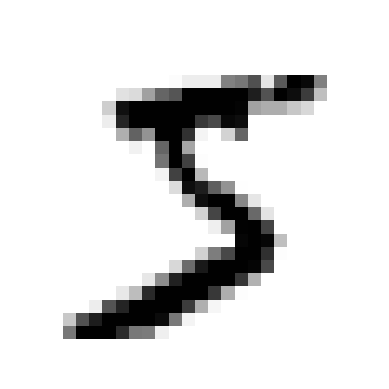

In [115]:
import matplotlib.pyplot as plt

image_vector = X.loc[0]
image = image_vector.to_numpy().reshape(28, 28)

plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show

Lets try left shift first

In [116]:
import numpy as np
image = image[:, 1:]
image = np.hstack([image, np.full((28, 1), 0)])
image.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

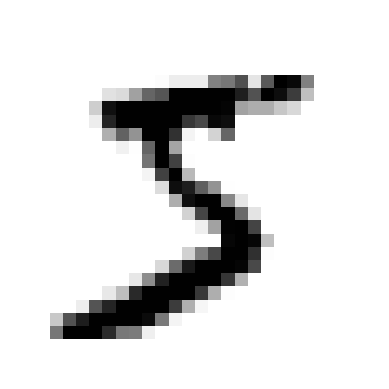

In [117]:
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show

Now, creating a function to shift any direction

In [118]:
def shift(image, direction):
    if(direction=="left"):
        image = image[:, 1:]
        image = np.hstack([image, np.full((28, 1), 0)])

    if(direction=="right"):
        image = image[:, :-1]
        image = np.hstack([np.full((28, 1), 0), image])

    if(direction=="top"):
        image = image[1:, :]
        image = np.vstack([image, np.full((1, 28), 0)])

    if(direction=="bottom"):
        image = image[:-1, :]
        image = np.vstack([np.full((1, 28), 0), image])
    
    return image

<function matplotlib.pyplot.show(close=None, block=None)>

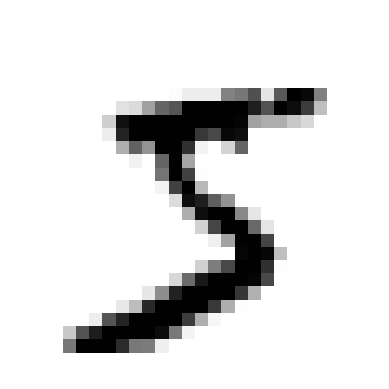

In [119]:
new_image = shift(image=X.loc[0].to_numpy().reshape(28, 28), direction="bottom")

plt.imshow(new_image, cmap="binary")
plt.axis("off")
plt.show

In [120]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [210]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
X_train_new = X_train.copy()
y_train_new = X_train.copy()

In [ ]:
import pandas as pd

left_shifted = []
right_shifted = []
top_shifted = []
bottom_shifted = []

for i in range(60000):
    shifted = shift(X.loc[i].to_numpy().reshape(28, 28), "left").reshape(784)
    left_shifted.append(shifted)

for i in range(60000):
    shifted = shift(X.loc[i].to_numpy().reshape(28, 28), "right").reshape(784)
    right_shifted.append(shifted)

for i in range(60000):
    shifted = shift(X.loc[i].to_numpy().reshape(28, 28), "top").reshape(784)
    top_shifted.append(shifted)

for i in range(60000):
    shifted = shift(X.loc[i].to_numpy().reshape(28, 28), "bottom").reshape(784)
    bottom_shifted.append(shifted)

all_shifted = left_shifted + right_shifted + top_shifted + bottom_shifted

df_to_add = pd.DataFrame(all_shifted, columns=X_train_new.columns)
X_train_new = pd.concat([X_train_new, df_to_add], ignore_index=True)

In [205]:
X_train_new.shape

(60060, 784)

In [ ]:
for index, row in X_train.iterrows():
    X_train_new.loc[len(X_train_new)] = shift(row.to_numpy().reshape(28, 28), "left").reshape(784)

In [ ]:
for index, row in X_train.iterrows():
    X_train_new.loc[len(X_train_new)] = shift(row.to_numpy().reshape(28, 28), "top").reshape(784)

In [ ]:
for index, row in X_train.iterrows():
    X_train_new.loc[len(X_train_new)] = shift(row.to_numpy().reshape(28, 28), "bottom").reshape(784)